In [40]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt 
from matplotlib.pyplot import MultipleLocator

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [41]:
data=pd.read_csv('global_evdata.csv')
data

,region,category,parameter,mode,powertrain,year,unit,sales
0,World,Historical,EV sales,Cars,EV,2010,Vehicles,7570
1,World,Historical,EV sales,Cars,EV,2011,Vehicles,48000
2,World,Historical,EV sales,Cars,EV,2012,Vehicles,118000
3,World,Historical,EV sales,Cars,EV,2013,Vehicles,201000
4,World,Historical,EV sales,Cars,EV,2014,Vehicles,330000
5,World,Historical,EV sales,Cars,EV,2015,Vehicles,550000
6,World,Historical,EV sales,Cars,EV,2016,Vehicles,750000
7,World,Historical,EV sales,Cars,EV,2017,Vehicles,1180000
8,World,Historical,EV sales,Cars,EV,2018,Vehicles,2050000
9,World,Historical,EV sales,Cars,EV,2019,Vehicles,2080000


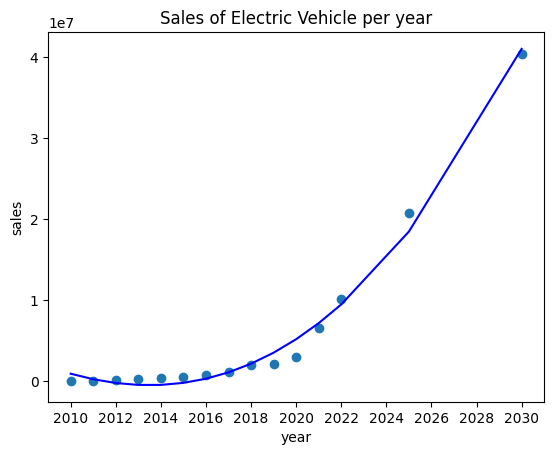

In [42]:
year = list(data.loc[:, 'year']) 
sales = list(data.loc[:, 'sales']) 

## 組合成DataFrame格式
data_dict = {'year': year, 'sales': sales}
df = pd.DataFrame(data_dict)
X = df[['year']]
y = df[['sales']]

## 訓練多項式迴歸模型
regressor = make_pipeline(PolynomialFeatures(4), LinearRegression())
regressor.fit(X,y)


# 使用訓練好的模型進行預測
#y_pred_new = regressor.predict(X_new)

# 打印預測結果
#print('Predictions for X_new: ')
#print((y_pred_new))

## 視覺化
x_major_locator = MultipleLocator(2)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.scatter(X,y)
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Sales of Electric Vehicle per year')
plt.xlabel("year")
plt.ylabel("sales")
plt.show()

In [43]:
car=pd.read_csv('recommendation.csv')
car["Acceleration"] = car["Acceleration"].str.replace("sec", "")
car["TopSpeed"] = car["TopSpeed"].str.replace("km/h", "")
car["Range"] = car["Range"].str.replace("km", "")
car["Efficiency"] = car["Efficiency"].str.replace("Wh/km", "")
car["FastChargeSpeed"] = car["FastChargeSpeed"].str.replace("km/h", "")

car2=car.copy()
car2

,Name,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats
0,Tesla Roadster,2.1,410,970,206,920,4
1,Tesla Model X Plaid,2.6,262,455,198,680,7
2,Porsche Taycan Turbo S,2.8,260,390,215,860,4
3,Porsche Taycan Turbo S Cross Turismo,2.9,250,380,220,790,4
4,Tesla Cybertruck Tri Motor,3,210,750,267,710,7
...,...,...,...,...,...,...,...
176,Opel Zafira-e Life L 75 kWh,13.3,130,270,252,290,7
177,Peugeot e-Traveller Standard 75 kWh,13.3,130,270,252,290,7
178,Peugeot e-Traveller Long 75 kWh,13.3,130,270,252,290,7
179,Nissan e-NV200 Evalia,14.0,123,165,218,170,7


In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
Acceleration = list(car.loc[:, 'Acceleration']) 
TopSpeed = list(car.loc[:, 'TopSpeed'])
Range= list(car.loc[:, 'Range'])
Efficiency=list(car.loc[:, 'Efficiency'])
FastChargeSpeed = list(car.loc[:, 'FastChargeSpeed'])
NumberofSeats = list(car.loc[:, 'NumberofSeats'])

# 初始化MinMaxScaler
scaler = MinMaxScaler()

In [45]:
#GUI
import tkinter as tk
from PIL import Image, ImageTk
win = tk.Tk()
win.title('Electric Vehicle')
win.geometry("1400x700+100+50")
win.resizable(False, False)
win.config(background="#F9F5F6")

# 載入圖片並設置透明度
def adjust_opacity(image, opacity):     
    image = image.convert("RGBA")
    data = image.getdata()
    new_data = []
    for item in data:
        r, g, b, a = item
        new_data.append((r, g, b, int(opacity * a)))
    image.putdata(new_data)
    # 將PIL圖片轉換為Tkinter圖片
    #image_tk = ImageTk.PhotoImage(image)
    return image


# 添加封面圖片
image = Image.open("pic2.jpg")        # 開啟圖片
image = image.resize((1400, 800), Image.LANCZOS)
image = adjust_opacity(image, 0.95)
#image_tk= image.resize((1400, 800), Image.LANCZOS)
background_image = ImageTk.PhotoImage(image)    # 轉換為 tk 圖片物件
background = tk.Label(win, image=background_image)
background.place(x=0, y=0)
#background.pack(side="bottom")

#銷售量顯示
k=tk.Label(text="全球電動車每年銷量數據及預測",font=("Arial", 18),bg="#20262E",fg="#FFFBAC")
k.place(x="0",y="0")
choose=tk.Label(text="滑動選取",font=("Arial", 16),bg="#20262E",fg="white")
choose.pack()

def scale_changed(value):
    value = int(value)
    if value <= 2022:
        sales_value = df.loc[df['year'] == value, 'sales'].values[0]
        sales.config(text="Sales of Electric Vehicle in {} is {}".format(value, sales_value),font=("Arial", 18))
    else:
        value = str(value)
        X_new = pd.DataFrame({'year': [value]})
        y_pred_new = regressor.predict(X_new)
        y_pred_new = np.around(y_pred_new)
        sales.config(text="Sales Pridiction of Electric Vehicle in {} is {}".format(value, str(int(y_pred_new[0]))))        
    

# 創建一個滑動條
s = tk.Scale( from_=2010, to=2030, orient=tk.HORIZONTAL,length=700,bg="#20262E",fg="white" ,command=scale_changed)
s.config(tickinterval=1)
s.pack()

sales=tk.Label(font=("Arial", 18),fg="white",bg="#20262E",pady="5")
sales.pack()

user_features =np.array([0.0, 0,0,0,0,0])

#推薦系統
def confirm():
    if (c1.get() or c2.get() or c3.get() or c4.get() or c5.get() or c6.get()) != '':
        user_features[0] = float(c1.get())
        user_features[1] = float(c2.get())
        user_features[2] = float(c3.get())
        user_features[3] = float(c4.get())
        user_features[4] = float(c5.get())
        user_features[5] = float(c6.get())
        #將user_features加入database
        acceleration = np.append(car["Acceleration"].to_numpy(),str(user_features[0]))
        top_speed = np.append(car["TopSpeed"].to_numpy(),str(user_features[1]))
        range_data = np.append(car["Range"].to_numpy(),str(user_features[2]))
        efficiency = np.append(car["Efficiency"].to_numpy(),str(user_features[3]))
        fast_charge_speed = np.append(car["FastChargeSpeed"].to_numpy(),str(user_features[4]))
        num_seats = np.append(car["NumberofSeats"].to_numpy(),str(user_features[5]))

        # 轉換為NumPy數組
        acceleration = acceleration.reshape(-1, 1)
        top_speed = top_speed.reshape(-1, 1)
        range_data = range_data.reshape(-1, 1)
        efficiency = efficiency.reshape(-1, 1)
        fast_charge_speed = fast_charge_speed.reshape(-1, 1)
        num_seats = num_seats.reshape(-1, 1)

        # 進行歸一化
        acceleration_normalized = scaler.fit_transform(acceleration)
        top_speed_normalized = scaler.fit_transform(top_speed)
        range_normalized = scaler.fit_transform(range_data)
        efficiency_normalized = scaler.fit_transform(efficiency)
        fast_charge_speed_normalized = scaler.fit_transform(fast_charge_speed)
        num_seats_normalized = scaler.fit_transform(num_seats)

        #經過一些型態轉換得到user_features歸一化後的值
        acceleration_normalized1 = acceleration_normalized.tolist()
        top_speed_normalized1 = top_speed_normalized.tolist()
        range_normalized1 = range_normalized.tolist()
        efficiency_normalized1 = efficiency_normalized.tolist()
        fast_charge_speed_normalized1 = fast_charge_speed_normalized.tolist()
        num_seats_normalized1 = num_seats_normalized.tolist()

        acc = acceleration_normalized1[-1]
        top = top_speed_normalized1[-1]
        ran = range_normalized1[-1]
        eff = efficiency_normalized1[-1]
        fas = fast_charge_speed_normalized1[-1]
        num = num_seats_normalized1[-1]

        user_features[0] = acc[0]
        user_features[1] = top[0]
        user_features[2] = ran[0]
        user_features[3] = eff[0]
        user_features[4] = fas[0]
        user_features[5] = num[0]

        #移除歸一的user_features
        acceleration_normalized_new = np.delete(acceleration_normalized,-1,axis=0)
        top_speed_normalized_new = np.delete(top_speed_normalized,-1,axis=0)
        range_normalized_new = np.delete(range_normalized,-1,axis=0)
        efficiency_normalized_new = np.delete(efficiency_normalized,-1,axis=0)
        fast_charge_speed_normalized_new = np.delete(fast_charge_speed_normalized,-1,axis=0)
        num_seats_normalized_new = np.delete(num_seats_normalized,-1,axis=0)

        # 將歸一化後的數據存回DataFrame中
        car["Acceleration"] = acceleration_normalized_new
        car["TopSpeed"] = top_speed_normalized_new
        car["Range"] = range_normalized_new
        car["Efficiency"] = efficiency_normalized_new
        car["FastChargeSpeed"] = fast_charge_speed_normalized_new
        car["NumberofSeats"] = num_seats_normalized_new

        user_features_normalized = user_features.reshape(1, -1)

        # 提取標準化後的特徵列
        normalized_features = car[["Acceleration", "TopSpeed", "Range", "Efficiency", "FastChargeSpeed", "NumberofSeats"]].to_numpy()
        # 計算相似度
        similarities = cosine_similarity(normalized_features, user_features_normalized)
        # 找到最相似的索引
        most_similar_index = np.argmax(similarities)
        # 推薦最合適的選項
        recommended_option = car2.loc[most_similar_index]
        
        # 打印推薦的選項
        result1 = tk.Label(text= "Name:   " + recommended_option[0] ,font=("Arial", 18),fg="white",bg="#20262E")
        result1.place(x="830",y="320")
        result2 = tk.Label(text= "0~100 Acceleration:  " + recommended_option[1]+"  sec" ,font=("Arial", 14),fg="white",bg="#20262E")
        result2.place(x="860",y="350")
        result3 = tk.Label(text= "TopSpeed:   " + recommended_option[2]+"  km/h" ,font=("Arial", 14),fg="white",bg="#20262E")
        result3.place(x="860",y="380")
        result4 = tk.Label(text= "Range:   " + recommended_option[3]+"  km" ,font=("Arial", 14),fg="white",bg="#20262E")
        result4.place(x="860",y="410")
        result5 = tk.Label(text= "Efficiency:   " + recommended_option[4]+"  Wh/km" ,font=("Arial", 14),fg="white",bg="#20262E")
        result5.place(x="860",y="440")
        result6 = tk.Label(text= "FastChargeSpeed:   " + recommended_option[5]+"  km/h" ,font=("Arial", 14),fg="white",bg="#20262E")
        result6.place(x="860",y="470")
        result7 = tk.Label(text= "Seats number:  " + str(recommended_option[6]) ,font=("Arial", 14),fg="white",bg="#20262E")
        result7.place(x="860",y="500")


p=tk.Label(text="電動車推薦",font=("Arial", 18),bg="#20262E",fg="#FFFBAC")
p.place(x="0",y="160")
a=tk.Label(text="輸入想要的電動車性能",font=("Arial", 18),fg="white",bg="#20262E")
a.place(x="570",y="200")
#Acceleration
b1=tk.Label(text="0~100 Acceleration :  (2~15) ",font=("Arial", 16),fg="white",bg="#20262E")
b1.place(x="180",y="280")
c1=tk.Entry(font=("Arial", 15),fg="white",bg="#20262E",width="8")
c1.place(x="490",y="280")
#top speed
b2=tk.Label(text="top speed :  (120~400)",font=("Arial", 16),fg="white",bg="#20262E")
b2.place(x="180",y="330")
c2=tk.Entry(font=("Arial", 15),fg="white",bg="#20262E",width="8")
c2.place(x="490",y="330")
#range
b3=tk.Label(text="range :  (100~1000)",font=("Arial", 16),fg="white",bg="#20262E")
b3.place(x="180",y="380")
c3=tk.Entry(font=("Arial", 15),fg="white",bg="#20262E",width="8")
c3.place(x="490",y="380")
#efficiency
b4=tk.Label(text="efficiency :  (150~250)",font=("Arial", 16),fg="white",bg="#20262E")
b4.place(x="180",y="430")
c4=tk.Entry(font=("Arial", 15),fg="white",bg="#20262E",width="8")
c4.place(x="490",y="430")
#fast_charge_speed
b5=tk.Label(text="fast charge speed :(200~1400)",font=("Arial", 16),fg="white",bg="#20262E")
b5.place(x="180",y="480")
c5=tk.Entry(font=("Arial", 15),fg="white",bg="#20262E",width="8")
c5.place(x="490",y="480")
#num_seats
b6=tk.Label(text="seats number:  (4 or 5 or 7)",font=("Arial", 16),fg="white",bg="#20262E")
b6.place(x="180",y="530")
c6=tk.Entry(font=("Arial", 15),fg="white",bg="#20262E",width="8")
c6.place(x="490",y="530")

button = tk.Button(win, text='confirm',relief="groove",activeforeground="red",width="6",height="1",command=confirm)
button.config(bg="#20262E",fg="white",font=("Arial", 16))
button.place(x="330",y="580")

d = tk.Label(text="推薦結果 : ",font=("Arial", 18),fg="white",bg="#20262E")
d.place(x="800",y="270")


win.mainloop() 